Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

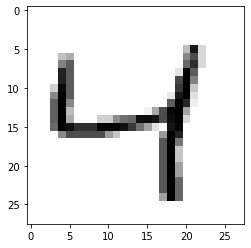

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
mnistDB=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnistDB.load_data()

plt.imshow(x_train[2],cmap='binary')
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
cnnModel_Mnist=keras.models.Sequential()
cnnModel_Mnist.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=x_train.shape[1:]))
cnnModel_Mnist.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
cnnModel_Mnist.add(keras.layers.MaxPooling2D((2,2)))
cnnModel_Mnist.add(keras.layers.Dropout(0.25))
cnnModel_Mnist.add(keras.layers.Flatten())
cnnModel_Mnist.add(keras.layers.Dense(128,activation='relu'))
cnnModel_Mnist.add(keras.layers.Dropout(0.25))
cnnModel_Mnist.add(keras.layers.Dense(10,activation='softmax'))
cnnModel_Mnist.summary()

In [14]:
cnnModel_Mnist.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnnModel_Mnist.fit(x_train,y_train,epochs=1,batch_size=16)
test_loss,test_accuracy=cnnModel_Mnist.evaluate(x_test,y_test)
print(test_loss,test_accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 0.0569 - accuracy: 0.9830
0.05688104405999184 0.9829999804496765


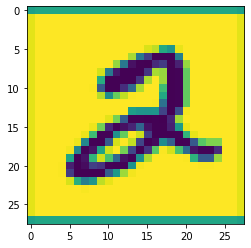

In [17]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
img=load_img('mnistimg1.png',grayscale=True,target_size=(28,28))
plt.imshow(img)


In [24]:
img=img_to_array(img)
img=img.reshape(1,28*28)
img=img.astype('float32')/255
cnnModel_Mnist.predict(img)
#print('digit is ',digit[0])

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 784]
